In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!mkdir data/
!wget https://raw.githubusercontent.com/ArushiiGupta/Afame_Technologies/main/Titanic-Dataset.csv

--2024-05-29 05:26:35--  https://raw.githubusercontent.com/ArushiiGupta/Afame_Technologies/main/Titanic-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘Titanic-Dataset.csv’

Titanic-Dataset.csv 100%[===================>]  59.76K  --.-KB/s    in 0.009s  

2024-05-29 05:26:35 (6.33 MB/s) - ‘Titanic-Dataset.csv’ saved [61194/61194]



In [ ]:
Arushi_df = pd.read_csv('/content/Titanic-Dataset.csv')
Arushi_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Arushi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Arushi_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df=Arushi_df.copy()

Since a lot of empty values are present in Cabin column, we thereby decide to drop the coloumn

In [ ]:
df = df.drop(columns='Cabin', axis=1)

Filling null values of Age with mean

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

Removing the two rows where the value of Embarked is zero

In [ ]:
df=df.dropna(subset=['Embarked'])

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

NULL Values have now been encountered

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

It can be seen that more than half of the passengers died

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

More number of males were present in the titanic ship

In [ ]:
df['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Most passengers were of 3rd class

In [ ]:
skewAge = df['Age'].skew(axis = 0, skipna = True)
print('Age', skewAge)

Age 0.43172026491227716


In [ ]:
skewAge = df['Fare'].skew(axis = 0, skipna = True)
print('Fare', skewAge)

Fare 4.801440211044194


<ipython-input-18-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

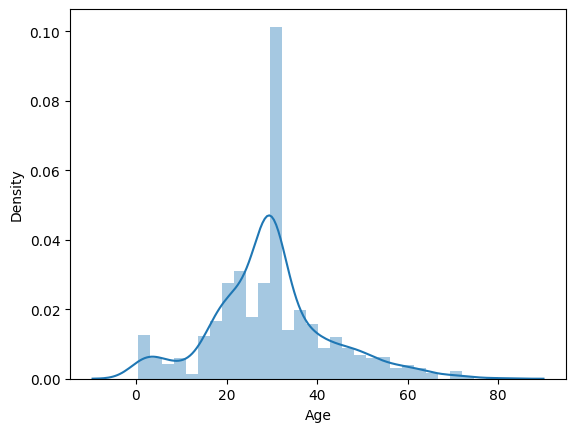

In [ ]:
sns.distplot(df['Age'])

<ipython-input-19-70b4b4beb1b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

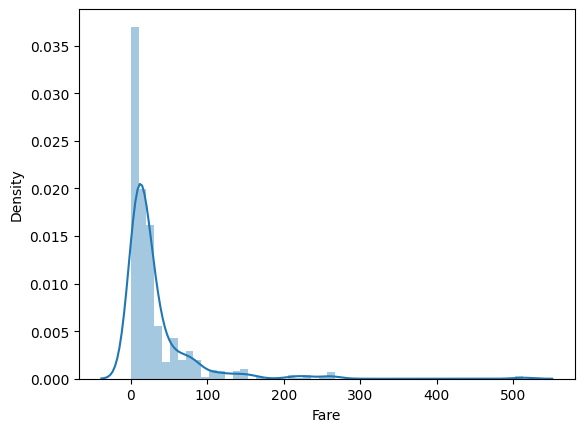

In [ ]:
sns.distplot(df['Fare'])

In [69]:
Arushi_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Count')

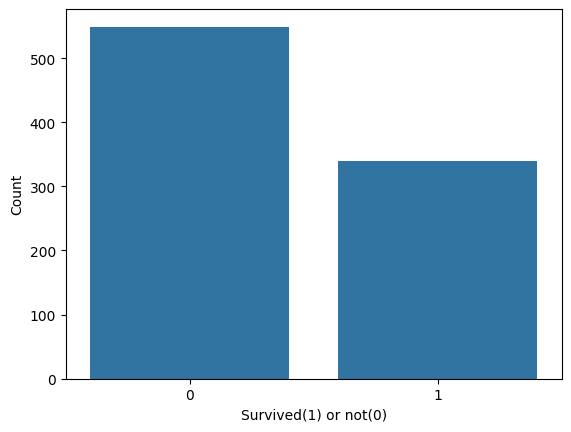

In [ ]:
sns.countplot(x="Survived", data=df)
plt.xlabel('Survived(1) or not(0)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

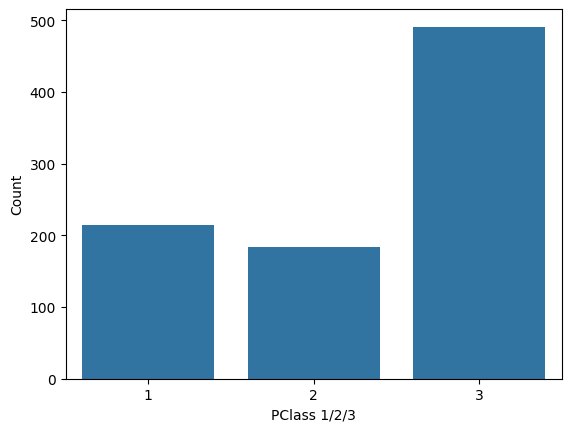

In [66]:
sns.countplot(x="Pclass", data=df)
plt.xlabel('PClass 1/2/3')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

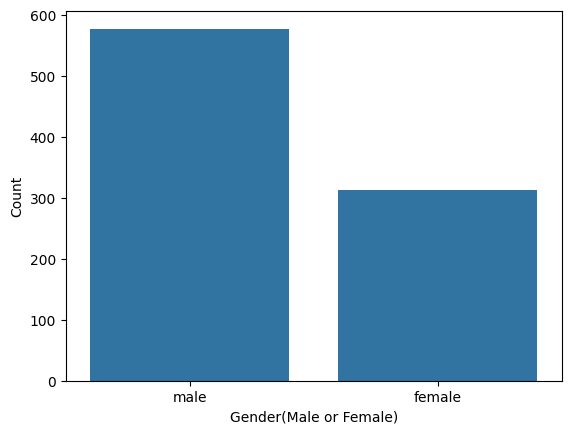

In [ ]:
sns.countplot(x="Sex", data=df)
plt.xlabel('Gender(Male or Female)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

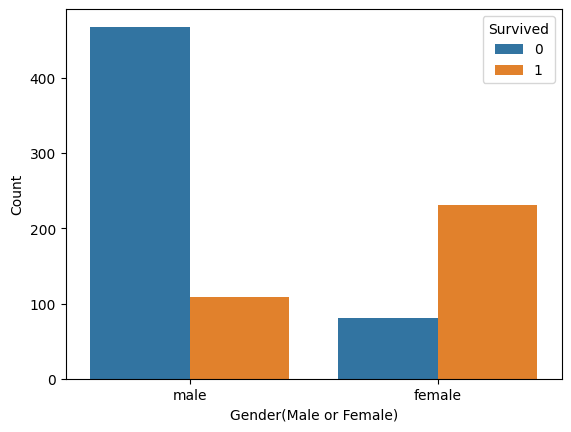

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.xlabel('Gender(Male or Female)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

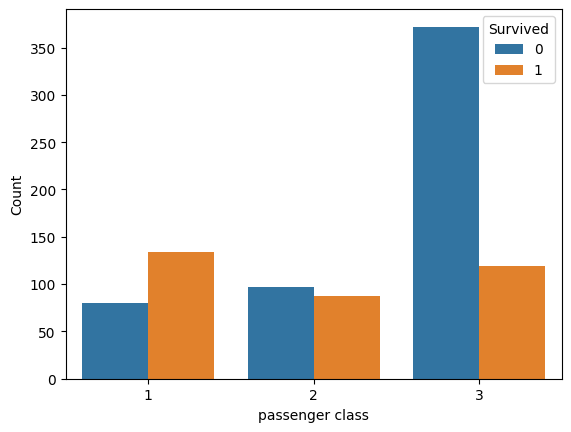

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.xlabel('passenger class')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

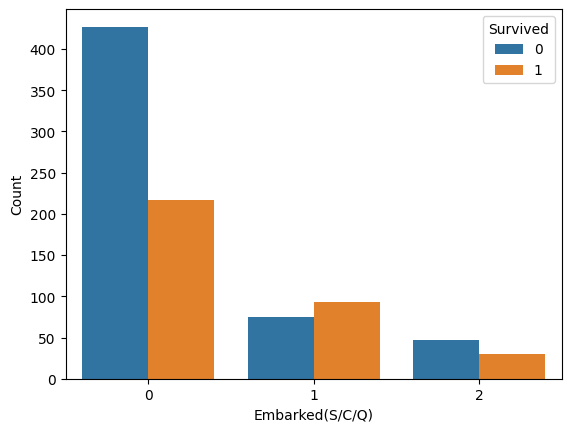

In [70]:
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.xlabel('Embarked(S/C/Q)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

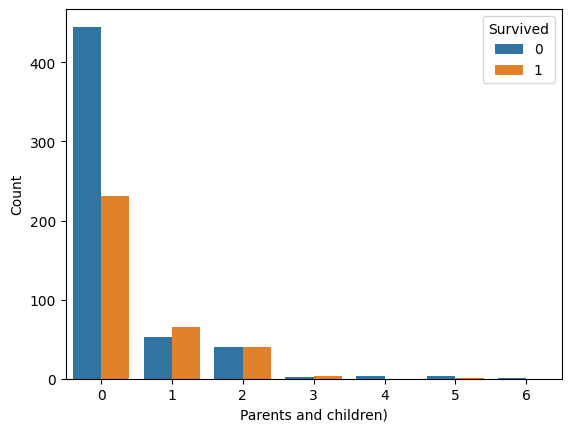

In [71]:
sns.countplot(x="Parch", hue="Survived", data=df)
plt.xlabel('Parents and children)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

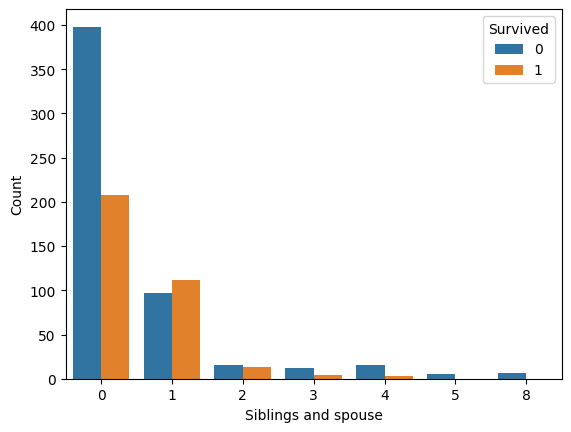

In [72]:
sns.countplot(x="SibSp", hue="Survived", data=df)
plt.xlabel('Siblings and spouse')
plt.ylabel('Count')

In [ ]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Outlier Detection

In [ ]:
from scipy import stats
def remove_outliers_zscore(column):
    z_scores = stats.zscore(column)
    outlier_indices = abs(z_scores) > 3
    column[outlier_indices] = column.mean()
    return column

In [ ]:
cleaned_column = remove_outliers_zscore(df['Fare'])
df['Fare_cleaned'] = cleaned_column
df.describe()

<ipython-input-15-9b7da5e8cd68>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_cleaned
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452,26.535109,0.362205,26.535109
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,28.953202,0.636157,28.953202
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,7.895800
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,164.866700,2.000000,164.866700


<ipython-input-17-c4a9e60e7bd6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare_cleaned'])


<Axes: xlabel='Fare_cleaned', ylabel='Density'>

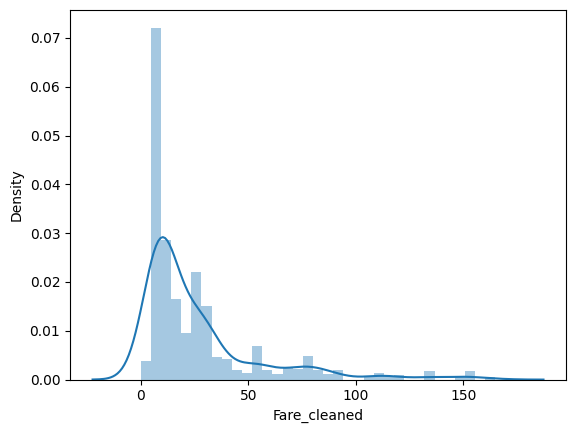

In [ ]:
sns.distplot(df['Fare_cleaned'])

In [ ]:
df=df.drop('Fare',axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare_cleaned
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0,8.0500


In [ ]:
df['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

The age will be divided into 7 age categories:

0 - 20 y.o.

21 - 30 y.o.

31 - 40 y.o.

41 - 50 y.o.

51 - 60 y.o.

61 - 70 y.o.

71 - 80 y.o.

In [ ]:
bins = [1, 20, 30, 40, 50, 60,70,80]
labels = ['1-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80']
df['Age_binned'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True).astype(str)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare_cleaned,Age_binned
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,7.2500,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1,71.2833,31-40
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0,7.9250,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0,53.1000,31-40
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0,8.0500,31-40


In [ ]:
print(df['Fare_cleaned'].value_counts().sort_index())

Fare_cleaned
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
135.6333     3
146.5208     2
151.5500     4
153.4625     3
164.8667     2
Name: count, Length: 240, dtype: int64


The Fare will be divided into 7 categories:

0 - 10.

11 - 30.

31 - 50.

51 - 70.

71 - 90

91 - 110

111 <

In [ ]:
bins2 = [0,10,30,50,70,90,110,170]
labels2 = ['0-10', '11-30', '31-50', '51-70', '71-90' , '91-110' , ' > 111']
df['Fare_binned'] = pd.cut(df['Fare_cleaned'], bins=bins2, labels=labels2,include_lowest=True).astype(str)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare_cleaned,Age_binned,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,7.2500,21-30,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1,71.2833,31-40,71-90
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0,7.9250,21-30,0-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0,53.1000,31-40,51-70
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0,8.0500,31-40,0-10


In [ ]:
df=df.drop(['Fare_cleaned','Age'],axis=1)

The dataset will be split into 70% training and 30% testing.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y =df['Survived']

In [ ]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_binned,Fare_binned
0,3,0,1,0,0,21-30,0-10
1,1,1,1,0,1,31-40,71-90
2,3,1,0,0,0,21-30,0-10
3,1,1,1,0,0,31-40,51-70
4,3,0,0,0,0,31-40,0-10


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state = 13)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [38]:
X_train = pd.get_dummies(X_train).astype(int)
X_test = pd.get_dummies(X_test).astype(int)

In [39]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_binned_1-20,Age_binned_21-30,Age_binned_31-40,Age_binned_41-50,Age_binned_51-60,Age_binned_61-70,Age_binned_71-80,Age_binned_nan,Fare_binned_ > 111,Fare_binned_0-10,Fare_binned_11-30,Fare_binned_31-50,Fare_binned_51-70,Fare_binned_71-90,Fare_binned_91-110
242,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
663,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
381,3,1,0,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
523,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106,3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [40]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_binned_1-20,Age_binned_21-30,Age_binned_31-40,Age_binned_41-50,Age_binned_51-60,Age_binned_61-70,Age_binned_71-80,Age_binned_nan,Fare_binned_ > 111,Fare_binned_0-10,Fare_binned_11-30,Fare_binned_31-50,Fare_binned_51-70,Fare_binned_71-90,Fare_binned_91-110
330,3,1,2,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
666,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
223,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
197,3,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
274,3,1,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       155
           1       0.89      0.69      0.77       112

    accuracy                           0.83       267
   macro avg       0.85      0.81      0.82       267
weighted avg       0.84      0.83      0.83       267

Logistic Regression accuracy is: 83.15%


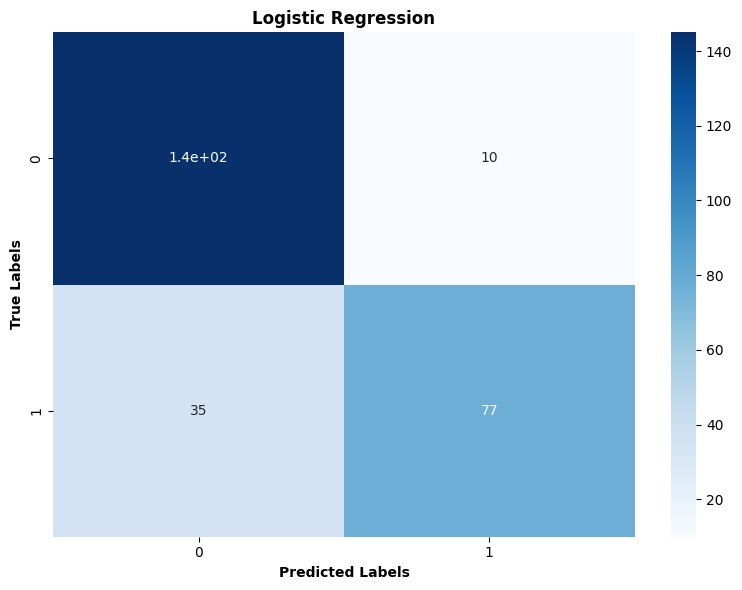

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))
cm = confusion_matrix(y_test, y_pred1)
acc1 = accuracy_score(y_pred1,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(acc1*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('Logistic Regression', fontweight='bold')

plt.tight_layout()


K Neighbours Classifier

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       155
           1       0.83      0.63      0.72       112

    accuracy                           0.79       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.79      0.78       267

K Neighbours accuracy is: 79.03%


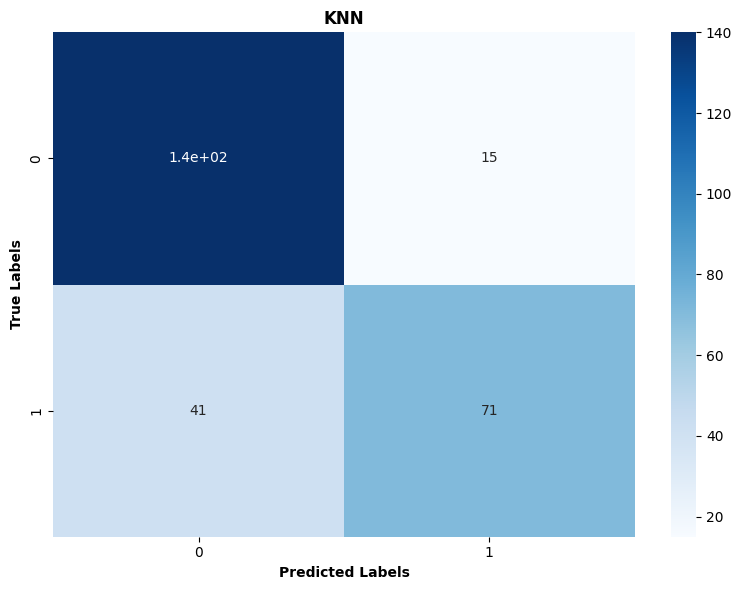

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))
cm = confusion_matrix(y_test, y_pred2)
acc2 = accuracy_score(y_pred2,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(acc2*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('KNN', fontweight='bold')

plt.tight_layout()

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       155
           1       0.92      0.58      0.71       112

    accuracy                           0.80       267
   macro avg       0.84      0.77      0.78       267
weighted avg       0.83      0.80      0.79       267

Decision Tree accuracy is: 80.15%


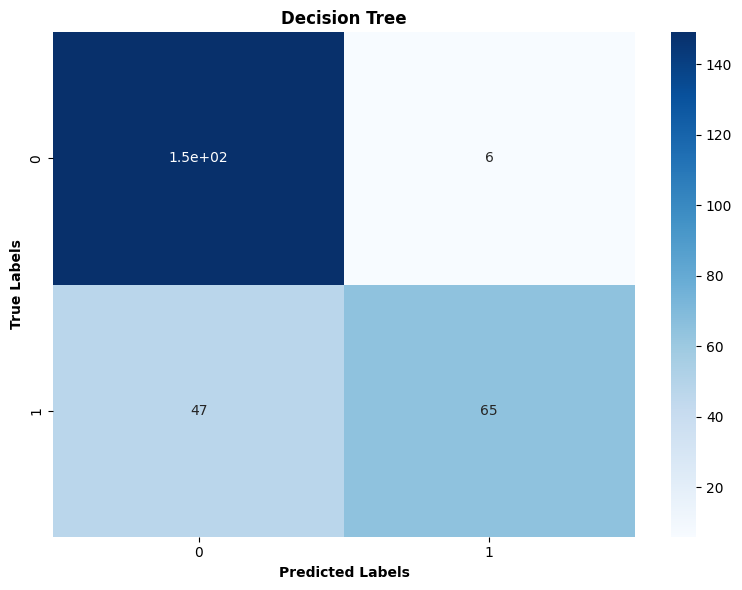

In [45]:
from sklearn.tree import DecisionTreeClassifier
model6 = DecisionTreeClassifier(max_leaf_nodes=5)
model6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)

print(classification_report(y_test, y_pred6))
cm = confusion_matrix(y_test, y_pred6)

acc6 = accuracy_score(y_pred6,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(acc6*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('Decision Tree', fontweight='bold')

plt.tight_layout()

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       155
           1       0.93      0.47      0.63       112

    accuracy                           0.76       267
   macro avg       0.82      0.72      0.73       267
weighted avg       0.81      0.76      0.74       267

Random Forest accuracy is: 76.40%


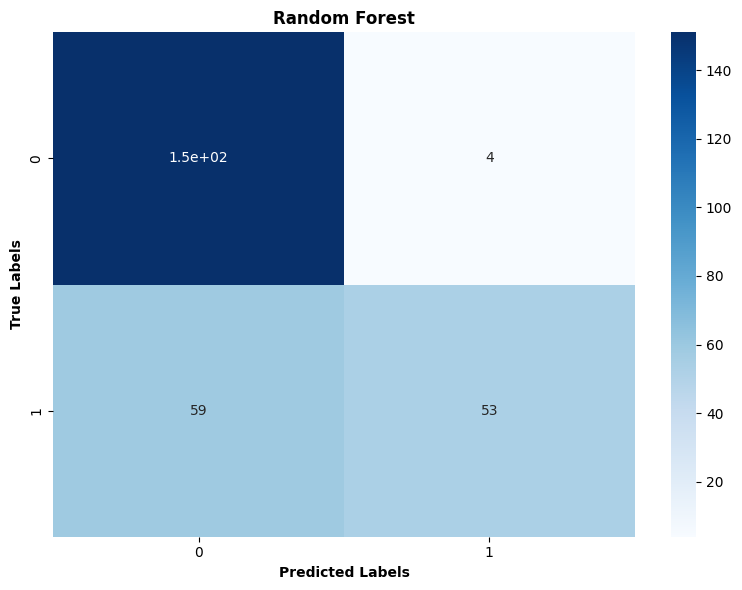

In [47]:
from sklearn.ensemble import RandomForestClassifier
model7 = RandomForestClassifier(max_leaf_nodes=5)
model7.fit(X_train, y_train)

y_pred7 = model7.predict(X_test)

print(classification_report(y_test, y_pred7))
cm = confusion_matrix(y_test, y_pred7)
acc7 = accuracy_score(y_pred7,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(acc7*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('Random Forest', fontweight='bold')

plt.tight_layout()

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       155
           1       0.86      0.70      0.77       112

    accuracy                           0.82       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.82      0.82       267

SVC accuracy is: 82.40%


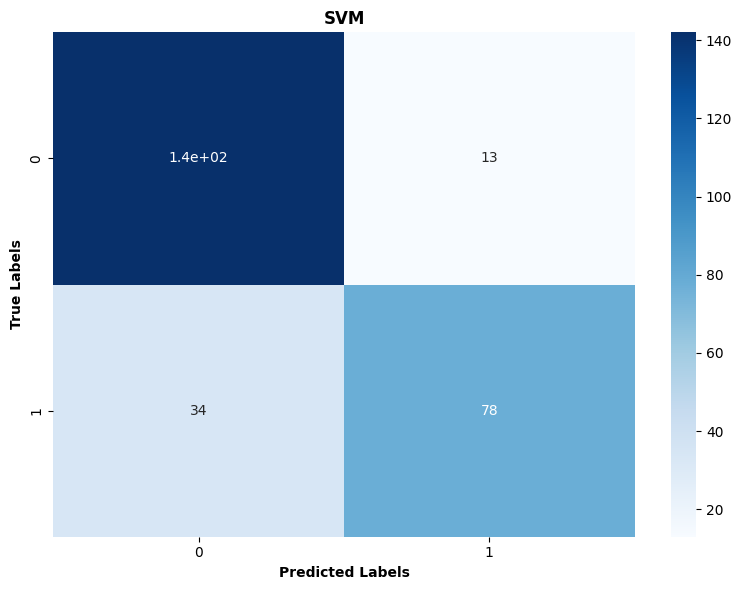

In [48]:
from sklearn.svm import SVC
model3 = SVC(kernel='rbf')
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

print(classification_report(y_test, y_pred3))
cm = confusion_matrix(y_test, y_pred3)
acc3 = accuracy_score(y_pred3,y_test)
print('SVC accuracy is: {:.2f}%'.format(acc3*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('SVM', fontweight='bold')

plt.tight_layout()

              precision    recall  f1-score   support

           0       0.62      0.99      0.77       155
           1       0.91      0.18      0.30       112

    accuracy                           0.65       267
   macro avg       0.77      0.58      0.53       267
weighted avg       0.74      0.65      0.57       267

GaussianNB accuracy is: 64.79%


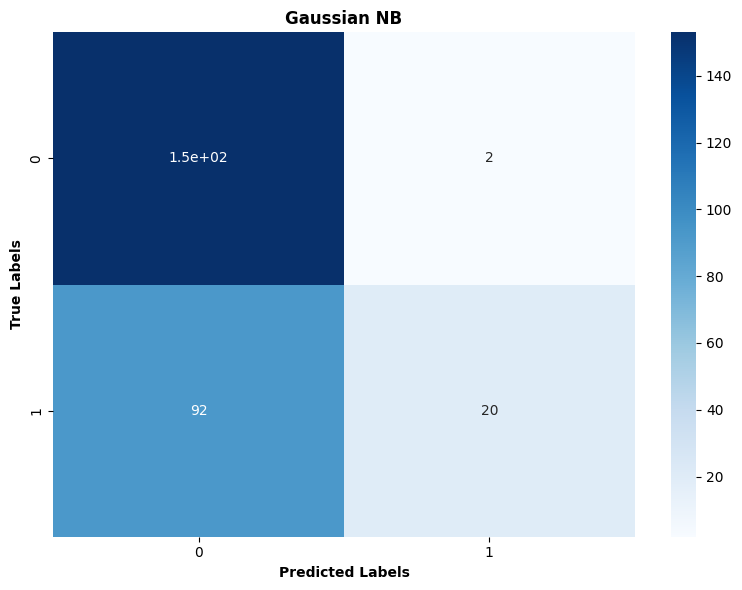

In [52]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)

print(classification_report(y_test, y_pred5))
cm = confusion_matrix(y_test, y_pred5)
acc5 = accuracy_score(y_pred5,y_test)
print('GaussianNB accuracy is: {:.2f}%'.format(acc5*100))
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('True Labels', fontweight='bold')
ax.set_title('Gaussian NB', fontweight='bold')

plt.tight_layout()

Model Comparison

In [53]:
before = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Decision Tree', 'Random Forest','Gaussian NB'],
                        'Score': [acc1*100, acc2*100, acc3*100, acc6*100, acc7*100, acc5*100]})
before.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,83.146067
2,SVM,82.397004
3,Decision Tree,80.149813
1,K Neighbors,79.026217
4,Random Forest,76.404494
5,Gaussian NB,64.794007


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'Decision Tree'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'Gaussian NB')])

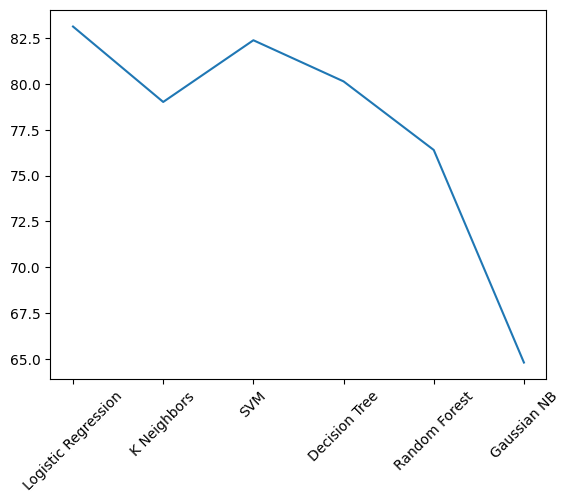

In [54]:
plt.plot(before['Model'],before['Score'])
plt.xticks(rotation=45)

In [55]:
def hyperparameter_tuning(X, y, models, scoring, cv=5, plot_results=True):
    best_models = {}
    for model_name, model in models.items():
        print(f"Tuning {model_name}...")
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=54)

        param_grid = define_param_grid(model)

        grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=cv, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
        best_models[model_name] = (best_model, best_score)

    return best_models

def define_param_grid(model):
    param_grids = {
        LogisticRegression: {'max_iter':[100,1000,5000],'solver':['liblinear']},
        GaussianNB: {},
        RandomForestClassifier: {'n_estimators': [100, 500, 1000],'max_leaf_nodes':[5,10,20,30]},
        DecisionTreeClassifier: {'max_leaf_nodes':[5,10,15,20]},
        SVC: {'kernel':['linear', 'poly', 'rbf'],'max_iter':[250,300,350]},
        KNeighborsClassifier: {'n_neighbors': [10, 15, 20,25]}
    }

    return param_grids.get(type(model), {})

In [56]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Gaussian NB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),


}
# Perform hyperparameter tuning
x = pd.get_dummies(X).astype(int)
best_models = hyperparameter_tuning(x,y, models, scoring='accuracy')

Tuning Logistic Regression...
Tuning K Neighbors...
Tuning SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Tuning Gaussian NB...
Tuning Decision Tree...
Tuning Random Forest...


In [57]:
best_models

{'Logistic Regression': (LogisticRegression(solver='liblinear'),
  0.8086709677419355),
 'K Neighbors': (KNeighborsClassifier(n_neighbors=15), 0.7749161290322581),
 'SVM': (SVC(max_iter=250), 0.8166451612903225),
 'Gaussian NB': (GaussianNB(), 0.6188516129032259),
 'Decision Tree': (DecisionTreeClassifier(max_leaf_nodes=15),
  0.8070451612903226),
 'Random Forest': (RandomForestClassifier(max_leaf_nodes=20, n_estimators=500),
  0.8134322580645161)}

BEST MODEL ACCURACY

In [58]:
model_data = [(k, v[0], v[1]) for k, v in best_models.items()]
tuned_results = pd.DataFrame(model_data, columns=['Model', 'Best Parameters', 'Score'])

In [60]:
tuned_results.head(6)

,Model,Best Parameters,Score
0,Logistic Regression,LogisticRegression(solver='liblinear'),0.808671
1,K Neighbors,KNeighborsClassifier(n_neighbors=15),0.774916
2,SVM,SVC(max_iter=250),0.816645
3,Gaussian NB,GaussianNB(),0.618852
4,Decision Tree,DecisionTreeClassifier(max_leaf_nodes=15),0.807045
5,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', m...",0.813432


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'Gaussian NB'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'Random Forest')])

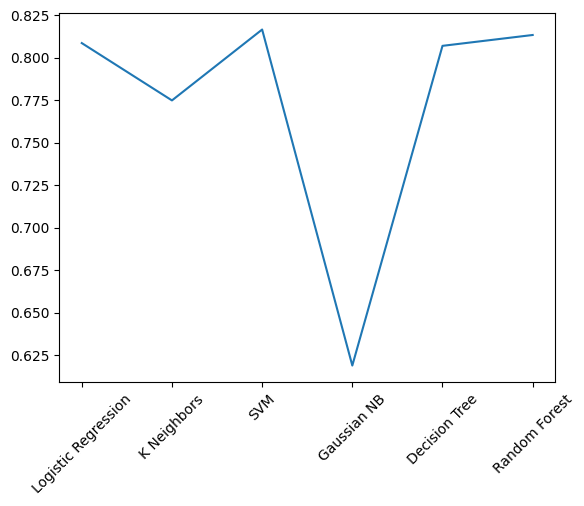

In [61]:
plt.plot(tuned_results['Model'],tuned_results['Score'])
plt.xticks(rotation=45)

In [62]:
merged = {'Model': tuned_results['Model'],
        'before_tuning': before['Score'],
        'after_tuning': tuned_results['Score']}
compare = pd.DataFrame(merged)

In [63]:
compare['after_tuning']=compare['after_tuning'].apply(lambda x: x*100)

In [64]:
compare.head(6)

,Model,before_tuning,after_tuning
0,Logistic Regression,83.146067,80.867097
1,K Neighbors,79.026217,77.491613
2,SVM,82.397004,81.664516
3,Gaussian NB,80.149813,61.885161
4,Decision Tree,76.404494,80.704516
5,Random Forest,64.794007,81.343226


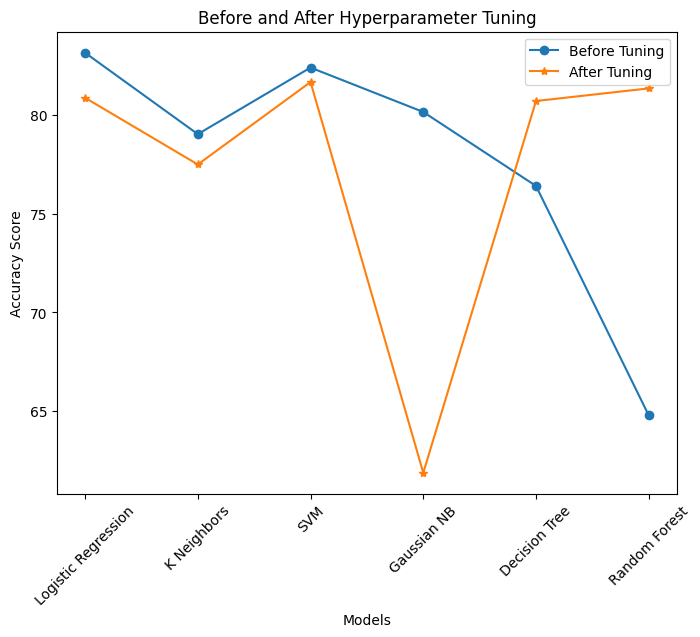

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(compare['Model'], compare['before_tuning'], label='Before Tuning', marker='o')
ax.plot(compare['Model'], compare['after_tuning'], label='After Tuning', marker='*')
plt.xticks(rotation=45)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_title('Before and After Hyperparameter Tuning')
ax.legend()